# NEUTRON: Microdosimetric analysis of Geant4 CNPTEPC simulation data
## Andrei R. Hanu - andrei.hanu@nasa.gov

In [50]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Color palette library for Python
# How to choose a colour scheme for your data:
# http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/
import brewer2mpl

In [51]:
##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
# fig_size =  [7.3,4.2]
fig_size =  [7.3*1.25,4.2*1.25]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Avant Garde',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [52]:
# Energy threshold for detection (eV)
Thr_TEPC = 0.
Thr_ACD = 1e6

In [53]:
##########################################################################################
# Load the simulation data
DataFrame = []

##########################################################################################
# Data location folder
# Data filename template
DataFolder = '../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/'
DataFilename = 'neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t*.csv'

##########################################################################################
# Process the simulation data files
# Column 0 - Energy deposited in the TEPC sensitive volume [eV]
# Column 1 - Track length of particles that entirely traverse the TEPC [mm]
# Column 2 - Energy deposited in the plastic scintillator [eV]
# Column 3 - Particle weight
for dataFile in glob.glob(DataFolder + DataFilename):  
    print 'Importing: ' + dataFile
    df = pandas.read_csv(dataFile, header=-1, skiprows=7, usecols=[0,1,2,3])
    DataFrame.append(df) 
    
# Merge the DataFrames from each file
Data = pandas.concat(DataFrame).values

# Print the number of total events (weighted)
print 'Total number of events: \t\t', Data[:,3].sum()
print 'Number of coincidence events: \t\t', Data[np.logical_and((Data[:,0] > Thr_TEPC),(Data[:,2] > Thr_ACD)),3].sum()
print 'Number of anti-coincidence events: \t', Data[np.logical_and((Data[:,0] > Thr_TEPC),(Data[:,2] <= Thr_ACD)),3].sum()
print 'Number of sub-threshold events: \t', Data[np.logical_and((Data[:,0] <= Thr_TEPC),(Data[:,2] <= Thr_ACD)),3].sum()

Importing: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t0.csv
Importing: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t1.csv
Importing: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t2.csv
Importing: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t3.csv
Importing: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t4.csv
Importing: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t5.csv
Importing: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t6.csv
Importing: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t7.csv
Total number of events: 		31520.3508203
Number of coincidence events: 		593.8733

In [54]:
##########################################################################################
# Logarithmic bin generation

# Mean Chord Length
xchord = 2.0*2/3       # 2 um Tissue Size 

# Logarithmic scale parameters
ymin = 0.1
ymax = 1000.0
B = 30
N = np.log10(ymax/ymin)
  
# Logarithmic bin generation
i = np.arange(B*N)
y2 = ymin*10**(i/B)
y2low = y2*10**(-0.5/B)
y2up = y2*10**(0.5/B)

In [55]:
##########################################################################################
# Redistribution of data in logarithmic scale

# Convert from energy deposited to linear energy (keV/um) 
# Note energy deposited is in units of eV
y = Data[Data[:,0] > Thr_TEPC,0]/xchord/1000;
y_COINC = Data[np.logical_and((Data[:,0] > Thr_TEPC),(Data[:,2] > Thr_ACD)),0]/xchord/1000;
y_ACOINC = Data[np.logical_and((Data[:,0] > Thr_TEPC),(Data[:,2] <= Thr_ACD)),0]/xchord/1000;

# Get the event weight (ie. Geant4 particle weight due to event biasing)
y_weight = Data[Data[:,0] > Thr_TEPC,3]
y_COINC_weight = Data[np.logical_and((Data[:,0] > Thr_TEPC),(Data[:,2] > Thr_ACD)),3]
y_ACOINC_weight = Data[np.logical_and((Data[:,0] > Thr_TEPC),(Data[:,2] <= Thr_ACD)),3]

# Use Numpy to bin the data into the new logarithmic bins
# This is much faster than looping through the data
# Weighted
Ny, bins = np.histogram(y/y_weight, bins=np.insert(y2up, y2up[0],y2low[0]),weights=y_weight)
Ny_COINC, bins = np.histogram(y_COINC/y_COINC_weight, bins=np.insert(y2up, y2up[0],y2low[0]),weights=y_COINC_weight)
Ny_ACOINC, bins = np.histogram(y_ACOINC/y_ACOINC_weight, bins=np.insert(y2up, y2up[0],y2low[0]),weights=y_ACOINC_weight)

# Unweighted
# Ny, bins = np.histogram(y/y_weight, bins=np.insert(y2up, y2up[0],y2low[0]))
# Ny_COINC, bins = np.histogram(y_COINC/y_COINC_weight, bins=np.insert(y2up, y2up[0],y2low[0]))
# Ny_ACOINC, bins = np.histogram(y_ACOINC/y_ACOINC_weight, bins=np.insert(y2up, y2up[0],y2low[0]))

# Create Y-Axis (yNy)
yNy = Ny*y2
yNy_COINC = Ny_COINC*y2
yNy_ACOINC = Ny_ACOINC*y2
ydy = (yNy/np.sum(yNy))*B/np.log(10)
ydy_COINC = (yNy_COINC/np.sum(yNy_COINC))*B/np.log(10)
ydy_ACOINC = (yNy_ACOINC/np.sum(yNy_ACOINC))*B/np.log(10)

Plot saved to: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t_Ny_3panel.pdf


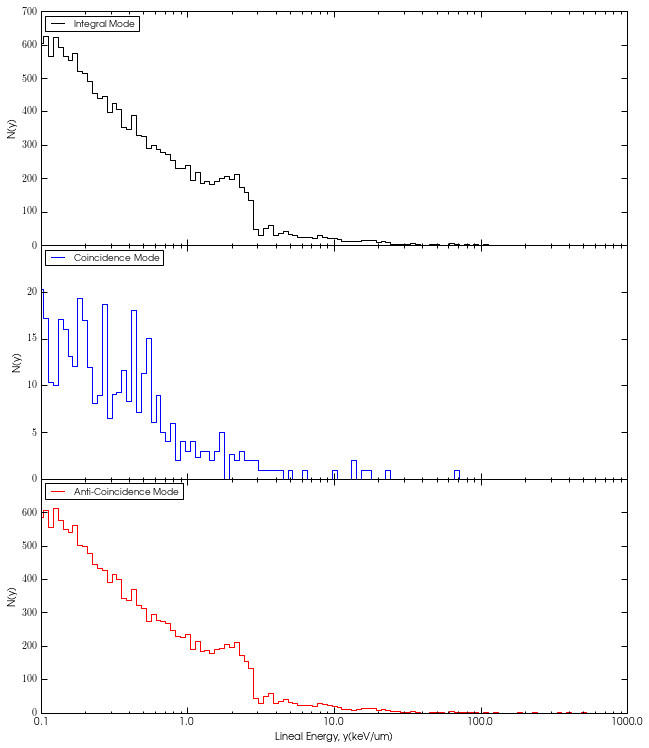

In [56]:
##########################################################################################
# Plot the y vs. yNy spectrum data
fig_Ny, (ax_Ny,ax_Ny_coinc,ax_Ny_acoinc) = plt.subplots(3, sharex=True,figsize=(fig_size[0],fig_size[1]*2))

# Combine y2low and y2up to create bins
y2_bins = np.concatenate((y2low,y2up))
y2_bins.sort(kind='mergesort')
# print y2_bins

ax_Ny.semilogx(y2_bins, np.repeat(Ny, 2), linewidth=1.0, label="Integral Mode", color='black', lw=2)
ax_Ny_coinc.semilogx(y2_bins, np.repeat(Ny_COINC, 2), linewidth=1.0, label="Coincidence Mode", color='blue', lw=2)
ax_Ny_acoinc.semilogx(y2_bins, np.repeat(Ny_ACOINC, 2), linewidth=1.0, label="Anti-Coincidence Mode", color='red', lw=2)

# Figure Properties
ax_Ny_acoinc.set_xlabel('Lineal Energy, y(keV/um)')
ax_Ny.set_ylabel('N(y)')   
ax_Ny_coinc.set_ylabel('N(y)')  
ax_Ny_acoinc.set_ylabel('N(y)')  
ax_Ny.set_xlim(ymin, ymax)
ax_Ny_coinc.set_xlim(ymin, ymax)
ax_Ny_acoinc.set_xlim(ymin, ymax)

# Remove the last ticks label from the bottom and middle y-axis subplot  
plt.setp(ax_Ny_coinc.get_yticklabels()[-1], visible=False)
plt.setp(ax_Ny_acoinc.get_yticklabels()[-1], visible=False)

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax_Ny.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_Ny.yaxis.set_major_formatter(ScalarFormatter())

ax_Ny.legend(loc='upper left')
ax_Ny_coinc.legend(loc='upper left')
ax_Ny_acoinc.legend(loc='upper left')

# Fine-tune figure 
# Make subplots close to each other
fig_Ny.tight_layout()
fig_Ny.subplots_adjust(hspace=0)

# Save the figure 
file_Ny = DataFilename.split('.')[0][:-1]+'_Ny_3panel.pdf'
plt.savefig(DataFolder + file_Ny, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_Ny)

# Show the figure
plt.show(fig_Ny)

Plot saved to: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t_yNy_3panel.pdf


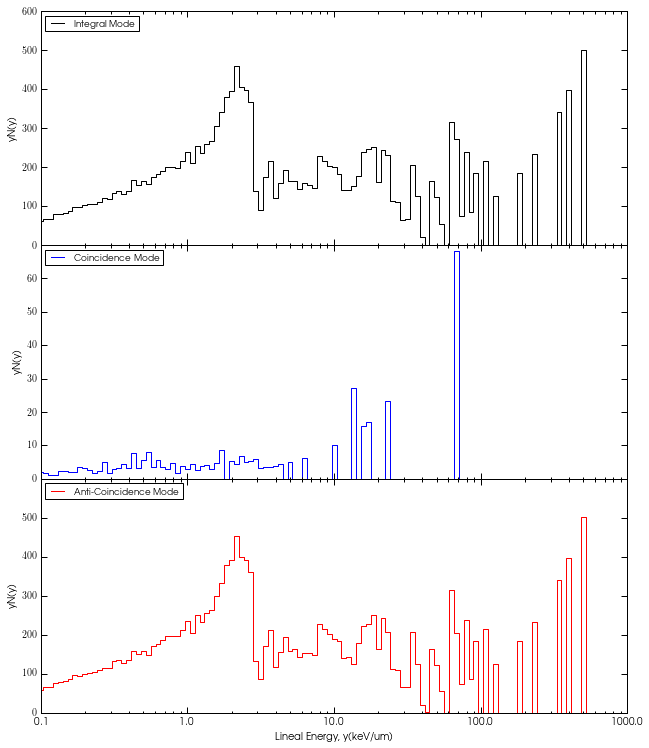

In [57]:
##########################################################################################
# Plot the y vs. yNy spectrum data
fig_yNy, (ax_yNy,ax_yNy_coinc,ax_yNy_acoinc) = plt.subplots(3, sharex=True,figsize=(fig_size[0],fig_size[1]*2))

# Combine y2low and y2up to create bins
y2_bins = np.concatenate((y2low,y2up))
y2_bins.sort(kind='mergesort')
# print y2_bins

ax_yNy.semilogx(y2_bins, np.repeat(yNy, 2), linewidth=1.0, label="Integral Mode", color='black', lw=2)
ax_yNy_coinc.semilogx(y2_bins, np.repeat(yNy_COINC, 2), linewidth=1.0, label="Coincidence Mode", color='blue', lw=2)
ax_yNy_acoinc.semilogx(y2_bins, np.repeat(yNy_ACOINC, 2), linewidth=1.0, label="Anti-Coincidence Mode", color='red', lw=2)

# Figure Properties
ax_yNy_acoinc.set_xlabel('Lineal Energy, y(keV/um)')
ax_yNy.set_ylabel('yN(y)')   
ax_yNy_coinc.set_ylabel('yN(y)')  
ax_yNy_acoinc.set_ylabel('yN(y)')  
ax_yNy.set_xlim(ymin, ymax)
ax_yNy_coinc.set_xlim(ymin, ymax)
ax_yNy_acoinc.set_xlim(ymin, ymax)
# ax_yNy.set_ylim(0, 1.0)
# ax_yNy.set_yticks([0.2,0.4,0.6,0.8])
# ax_yNy_coinc.set_ylim(0, 1.0)
# ax_yNy_coinc.set_yticks([0.2,0.4,0.6,0.8])
# ax_yNy_acoinc.set_ylim(0, 1.0)
# ax_yNy_acoinc.set_yticks([0.2,0.4,0.6,0.8])

# Remove the last ticks label from the bottom and middle y-axis subplot  
plt.setp(ax_yNy_coinc.get_yticklabels()[-1], visible=False)
plt.setp(ax_yNy_acoinc.get_yticklabels()[-1], visible=False)

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax_yNy.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_yNy.yaxis.set_major_formatter(ScalarFormatter())

ax_yNy.legend(loc='upper left')
ax_yNy_coinc.legend(loc='upper left')
ax_yNy_acoinc.legend(loc='upper left')

# Fine-tune figure 
# Make subplots close to each other
fig_yNy.tight_layout()
fig_yNy.subplots_adjust(hspace=0)

# Save the figure 
file_yNy = DataFilename.split('.')[0][:-1]+'_yNy_3panel.pdf'
plt.savefig(DataFolder + file_yNy, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_yNy)

# Show the figure
plt.show(fig_yNy)

Plot saved to: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t_yNy_1panel.pdf


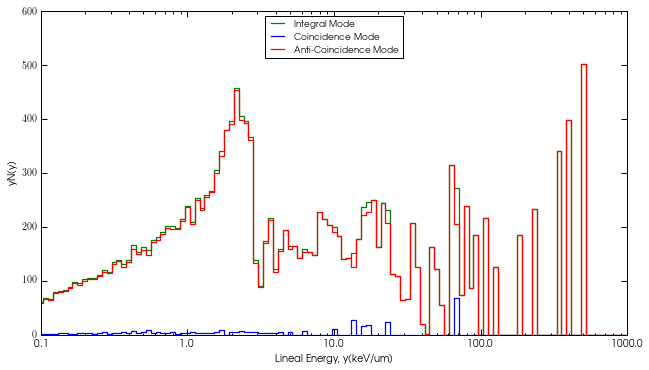

In [58]:
##########################################################################################
# Plot the y vs. ydy spectrum data
fig_yNy, (ax_yNy) = plt.subplots()

ax_yNy.semilogx(y2_bins, np.repeat(yNy, 2), lw=1.25, label="Integral Mode", color='green', linestyle="-", drawstyle='steps')
ax_yNy.semilogx(y2_bins, np.repeat(yNy_COINC, 2), lw=1.25, label="Coincidence Mode", color='blue', linestyle="-", drawstyle='steps')
ax_yNy.semilogx(y2_bins, np.repeat(yNy_ACOINC, 2), lw=1.25, label="Anti-Coincidence Mode", color='red', linestyle="-", drawstyle='steps')

# Figure Properties
ax_yNy.set_xlabel('Lineal Energy, y(keV/um)')
ax_yNy.set_ylabel('yN(y)')   
ax_yNy.set_xlim(ymin, ymax)
# ax_yNy.set_ylim(0, 0.6)
# ax_yNy.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax_yNy.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_yNy.yaxis.set_major_formatter(ScalarFormatter())

ax_yNy.legend(loc='upper center')

# Fine-tune figure 
fig_yNy.tight_layout()

# Save the figure 
file_yNy = DataFilename.split('.')[0][:-1]+'_yNy_1panel.pdf'
plt.savefig(DataFolder + file_yNy, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_yNy)

# Show the figure
plt.show(fig_yNy)

In [59]:
##########################################################################################
# Calculate the errors in each Ny bin
Ny_err, bins_Ny_err = np.histogram(np.sqrt(Ny)/Ny*100, bins=50, range=[0,100], normed=False, weights=None, density=None)

Plot saved to: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t_error.pdf


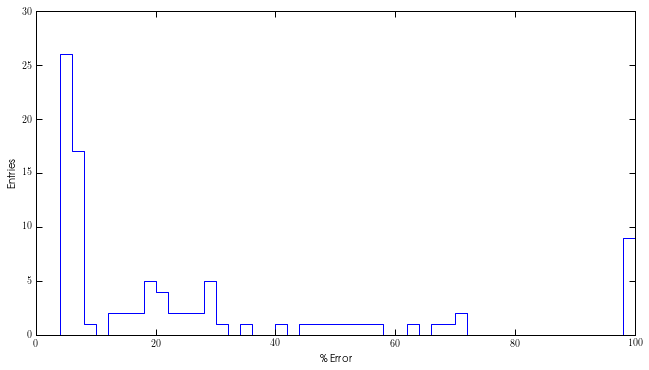

In [60]:
##########################################################################################
# Plot the errors
fig_Ny_err, ax_Ny_err = plt.subplots(1,1)

# Create the bin pairs
Ny_err_bins = np.concatenate((bins_Ny_err,bins_Ny_err[1:-1]))
Ny_err_bins.sort(kind='mergesort')

ax_Ny_err.plot(Ny_err_bins,
               np.repeat(Ny_err, 2), lw=1., label="Integral Mode", color='blue', linestyle="-", drawstyle='steps')

# Figure Properties
ax_Ny_err.set_xlabel('\% Error')
ax_Ny_err.set_ylabel('Entries')   
ax_Ny_err.set_xlim(np.min(bins_Ny_err), np.max(bins_Ny_err))

# Tight Layout
plt.tight_layout()

# Save the figure 
file_Ny_err = DataFilename.split('.')[0][:-1]+'_error.pdf'
plt.savefig(DataFolder + file_Ny_err, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_Ny_err)

# Show the figure
plt.show(fig_Ny_err)

TEPC Energy (eV) - Min:  7.23591209895e-92  Median:  102.426  Max:  681217.0
ACD Energy (eV) - Min:  0.0  Median:  11005.7  Max:  85945600.0
Plot saved to: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/neutron_11keV_Nr_1000000000_ISO_nt_G4CNPTEPC_t_eDep.pdf


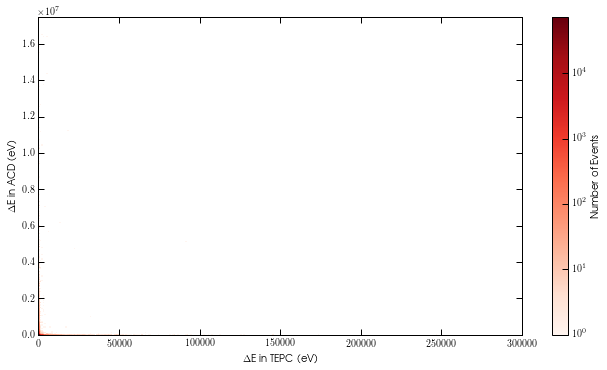

In [61]:
from matplotlib.colors import LogNorm

eDep_TEPC = Data[:,0]/Data[:,3]
eDep_ACD = Data[:,2]
print "TEPC Energy (eV) - Min: ",np.min(eDep_TEPC)," Median: ",np.median(eDep_TEPC)," Max: ",np.max(eDep_TEPC)
print "ACD Energy (eV) - Min: ",np.min(eDep_ACD)," Median: ",np.median(eDep_ACD)," Max: ",np.max(eDep_ACD)

##########################################################################################
# Plot of energy deposited in TEPC 

# Fix the number of bins
numBins = 3E2

# Create histogram
fig_eDep, ax_eDep = plt.subplots(1,1)

# Draw histogram
H = ax_eDep.hist2d(eDep_TEPC,eDep_ACD, numBins, range=np.array([(1E0, 3E5), (1E1, 1.75E7)]), 
                   cmap=brewer2mpl.get_map('Reds', 'sequential', 9, reverse=False).mpl_colormap,
                   norm=LogNorm())

# Draw the color bar
cbar = fig_eDep.colorbar(H[3], ax=ax_eDep, spacing='uniform', label='Number of Events')
cbar.solids.set_edgecolor("face")

# Figure Properties
ax_eDep.set_xlabel(r'$\Delta$E in TEPC (eV)')
ax_eDep.set_ylabel(r'$\Delta$E in ACD (eV)')   
ax_eDep.set_xlim(np.min(H[1]), np.max(H[1]))
ax_eDep.set_ylim(np.min(H[2]), np.max(H[2]))

from matplotlib.ticker import ScalarFormatter
ax_eDep.xaxis.set_major_formatter(ScalarFormatter())
ax_eDep.yaxis.set_major_formatter(ScalarFormatter())

# Tight Layout
plt.tight_layout()

# Save the figure 
file_eDep = DataFilename.split('.')[0][:-1]+'_eDep.pdf'
plt.savefig(DataFolder + file_eDep, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_eDep)

# Show the figure
plt.show(fig_eDep)